# 📊 Análisis de Precios de Tortilla en México

**Objetivo:** Realizar un análisis exploratorio completo de los precios de tortilla por kilogramo en distintas ciudades de México, extraer insights y aplicar modelos de Machine Learning para predicción.

**Fuente de datos:** tortilla_prices.csv - Precios de tortilla por ciudad, estado, tipo de tienda y fecha (2007-2016)

---
## 1. Importación de librerías y carga de datos

In [33]:
# Librerías para análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficas
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

# Cargar datos
ruta_csv = r"tortilla_prices.csv"
df = pd.read_csv(ruta_csv)

# Renombrar columnas a español
df = df.rename(columns={
    'State': 'Estado',
    'City': 'Ciudad',
    'Year': 'Año',
    'Month': 'Mes',
    'Day': 'Día',
    'Store type': 'Tipo de tienda',
    'Price per kilogram': 'Precio por kilogramo'
})

# Unificar nombres en Tipo de tienda
df['Tipo de tienda'] = df['Tipo de tienda'].replace({
    'Mom and Pop Store': 'Tortillerías',
    'Big Retail Store': 'Autoservicios'
})

print("✅ Datos cargados correctamente")
df.head(10)

✅ Datos cargados correctamente


,Estado,Ciudad,Año,Mes,Día,Tipo de tienda,Precio por kilogramo
0,Aguascalientes,Aguascalientes,2007,1,10,Tortillerías,9.9
1,Baja California,Mexicali,2007,1,10,Tortillerías,NaN
2,Baja California,Tijuana,2007,1,10,Tortillerías,10.0
3,Baja California Sur,La Paz,2007,1,10,Tortillerías,10.0
4,Campeche,Campeche,2007,1,10,Tortillerías,10.0
5,Coahuila,Piedras Negras,2007,1,10,Tortillerías,10.0
6,Coahuila,Saltillo,2007,1,10,Tortillerías,NaN
7,Colima,Colima,2007,1,10,Tortillerías,10.0
8,Chiapas,Tapachula,2007,1,10,Tortillerías,NaN
9,Chiapas,Tuxtla Gutiérrez,2007,1,10,Tortillerías,9.2


---
## 2. Exploración inicial y limpieza

Verificamos la estructura de los datos, tipos de variables y valores faltantes.

In [34]:
# Información general
print("📐 DIMENSIONES DEL DATASET")
print(f"   Filas: {len(df):,} | Columnas: {len(df.columns)}")
print("\n📋 ESTRUCTURA")
print(df.dtypes)
print("\n📊 VALORES FALTANTES")
print(df.isnull().sum())

📐 DIMENSIONES DEL DATASET
   Filas: 300,486 | Columnas: 7

📋 ESTRUCTURA
Estado                      str
Ciudad                      str
Año                       int64
Mes                       int64
Día                       int64
Tipo de tienda              str
Precio por kilogramo    float64
dtype: object

📊 VALORES FALTANTES
Estado                     0
Ciudad                     0
Año                        0
Mes                        0
Día                        0
Tipo de tienda             0
Precio por kilogramo    6390
dtype: int64


In [35]:
# Limpieza: convertir Precio por kilogramo a numérico y eliminar filas sin precio
df['Precio por kilogramo'] = pd.to_numeric(df['Precio por kilogramo'], errors='coerce')
df_limpio = df.dropna(subset=['Precio por kilogramo']).copy()

# Crear columna de fecha
df_limpio['Fecha'] = pd.to_datetime(df_limpio[['Año', 'Mes', 'Día']].rename(columns={'Año': 'year', 'Mes': 'month', 'Día': 'day'}))

print(f"Registros originales: {len(df):,}")
print(f"Registros con precio válido: {len(df_limpio):,}")
print(f"Registros eliminados (sin precio): {len(df) - len(df_limpio):,}")

Registros originales: 300,486
Registros con precio válido: 294,096
Registros eliminados (sin precio): 6,390


In [36]:
# Valores únicos por categoría
print("🏪 TIPOS DE TIENDA:", df_limpio['Tipo de tienda'].unique())
print("\n📅 RANGO DE AÑOS:", df_limpio['Año'].min(), "-", df_limpio['Año'].max())
print("\n🏙️ NÚMERO DE ESTADOS:", df_limpio['Estado'].nunique())
print("🏙️ NÚMERO DE CIUDADES:", df_limpio['Ciudad'].nunique())

🏪 TIPOS DE TIENDA: <StringArray>
['Tortillerías', 'Autoservicios']
Length: 2, dtype: str

📅 RANGO DE AÑOS: 2007 - 2025

🏙️ NÚMERO DE ESTADOS: 32
🏙️ NÚMERO DE CIUDADES: 56


---
## 3. Estadísticas descriptivas

In [37]:
df_limpio['Precio por kilogramo'].describe()

count    294096.000000
mean         12.615429
std           4.888099
min           0.000000
25%           9.700000
50%          11.500000
75%          14.500000
max          31.710000
Name: Precio por kilogramo, dtype: float64

---
## 4. Visualizaciones y análisis exploratorio

### 4.1 Evolución del precio promedio nacional a lo largo del tiempo

C:\Users\Jaime\AppData\Local\Temp\ipykernel_6936\4290605543.py:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Jaime\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


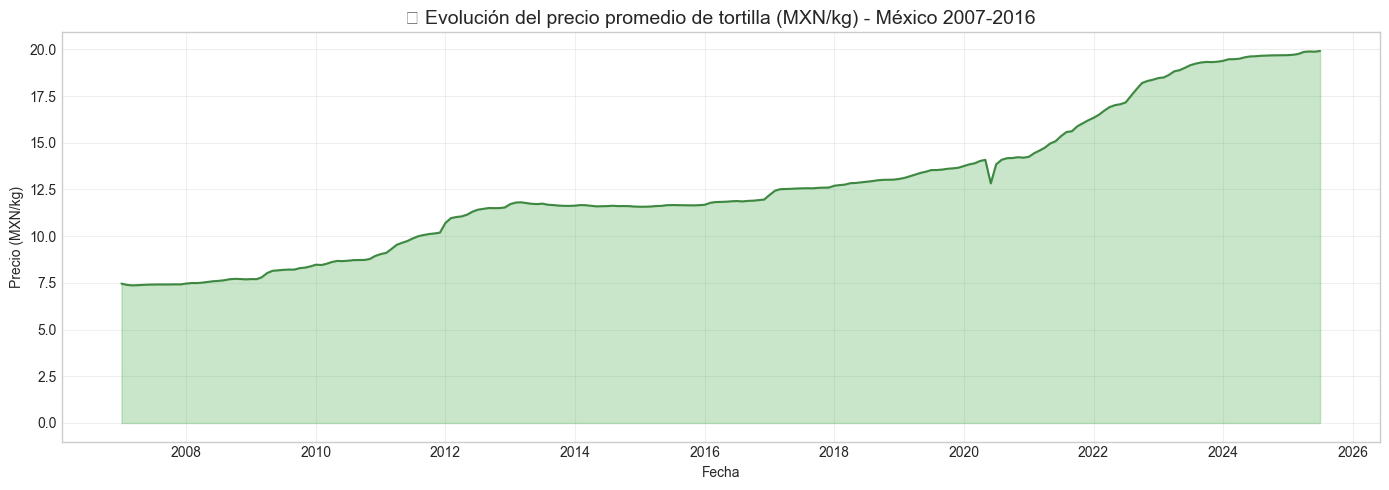

In [38]:
# Precio promedio mensual por año
precio_mensual = df_limpio.groupby(['Año', 'Mes'])['Precio por kilogramo'].mean().reset_index()
precio_mensual['Fecha_str'] = precio_mensual['Año'].astype(str) + '-' + precio_mensual['Mes'].astype(str).str.zfill(2)
precio_mensual['Fecha_plot'] = pd.to_datetime(precio_mensual['Fecha_str'])

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(precio_mensual['Fecha_plot'], precio_mensual['Precio por kilogramo'], color='#2E7D32', linewidth=1.5, alpha=0.9)
ax.fill_between(precio_mensual['Fecha_plot'], precio_mensual['Precio por kilogramo'], alpha=0.3, color='#4CAF50')
ax.set_title('📈 Evolución del precio promedio de tortilla (MXN/kg) - México 2007-2016', fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio (MXN/kg)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight 1:** Se observa una tendencia general al alza en el precio de la tortilla durante el periodo 2007-2016, con picos notables (posiblemente vinculados a la crisis alimentaria de 2007-2008 y fluctuaciones del maíz).

### 4.2 Precio por tipo de tienda

C:\Users\Jaime\AppData\Local\Temp\ipykernel_6936\2523608789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x='Tipo de tienda', y='Precio por kilogramo', ax=axes[0], palette='Set3')


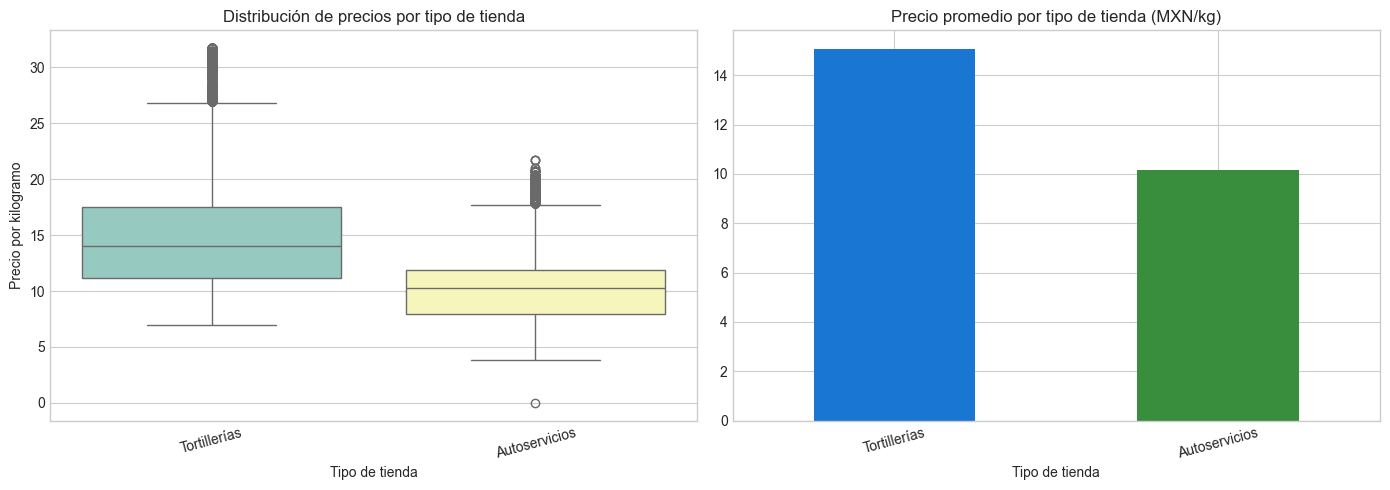

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot por tipo de tienda
sns.boxplot(data=df_limpio, x='Tipo de tienda', y='Precio por kilogramo', ax=axes[0], palette='Set3')
axes[0].set_title('Distribución de precios por tipo de tienda')
axes[0].tick_params(axis='x', rotation=15)

# Barras con promedio
precio_por_tienda = df_limpio.groupby('Tipo de tienda')['Precio por kilogramo'].mean().sort_values(ascending=False)
precio_por_tienda.plot(kind='bar', ax=axes[1], color=['#1976D2', '#388E3C', '#F57C00', '#7B1FA2'])
axes[1].set_title('Precio promedio por tipo de tienda (MXN/kg)')
axes[1].tick_params(axis='x', rotation=15)
plt.tight_layout()
plt.show()

**Insight 2:** Las diferencias de precio entre tipos de tienda pueden indicar márgenes comerciales distintos; las tortillerías pueden ser más baratas o más caras que los autoservicios dependiendo de la región.

### 4.3 Top 10 ciudades más caras y más baratas (promedio 2007-2016)

C:\Users\Jaime\AppData\Local\Temp\ipykernel_6936\1825921814.py:13: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Jaime\AppData\Local\Temp\ipykernel_6936\1825921814.py:13: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Jaime\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jaime\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


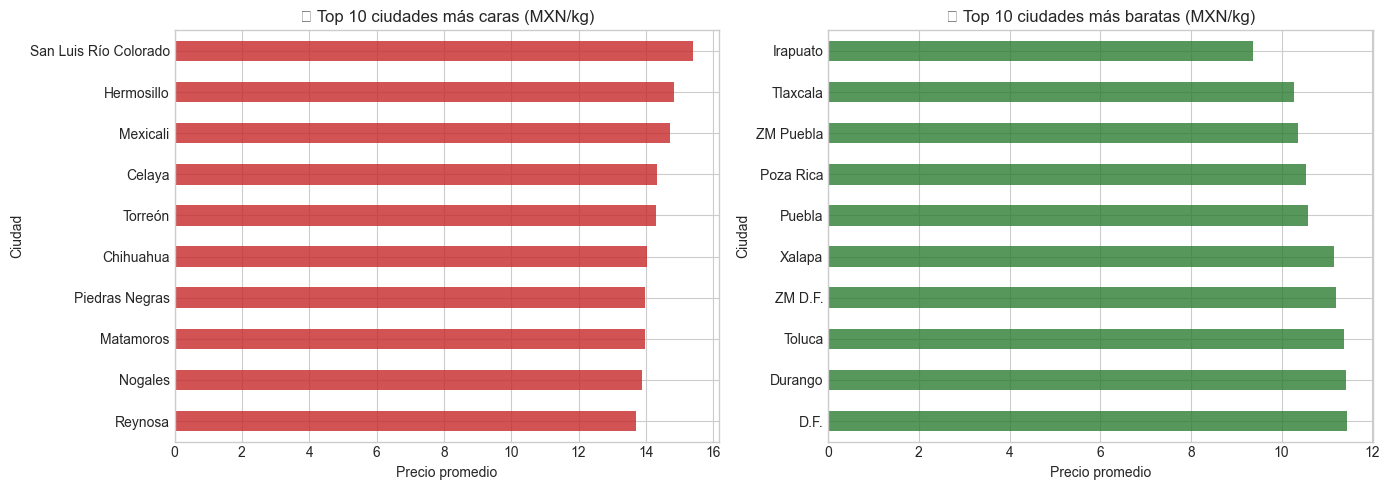

In [40]:
precio_ciudad = df_limpio.groupby('Ciudad')['Precio por kilogramo'].mean()
top10_caras = precio_ciudad.nlargest(10)
top10_baratas = precio_ciudad.nsmallest(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
top10_caras.sort_values().plot(kind='barh', ax=axes[0], color='#C62828', alpha=0.8)
axes[0].set_title('🔺 Top 10 ciudades más caras (MXN/kg)')
axes[0].set_xlabel('Precio promedio')

top10_baratas.sort_values(ascending=False).plot(kind='barh', ax=axes[1], color='#2E7D32', alpha=0.8)
axes[1].set_title('🔻 Top 10 ciudades más baratas (MXN/kg)')
axes[1].set_xlabel('Precio promedio')
plt.tight_layout()
plt.show()

### 4.4 Distribución del precio y variación por estado

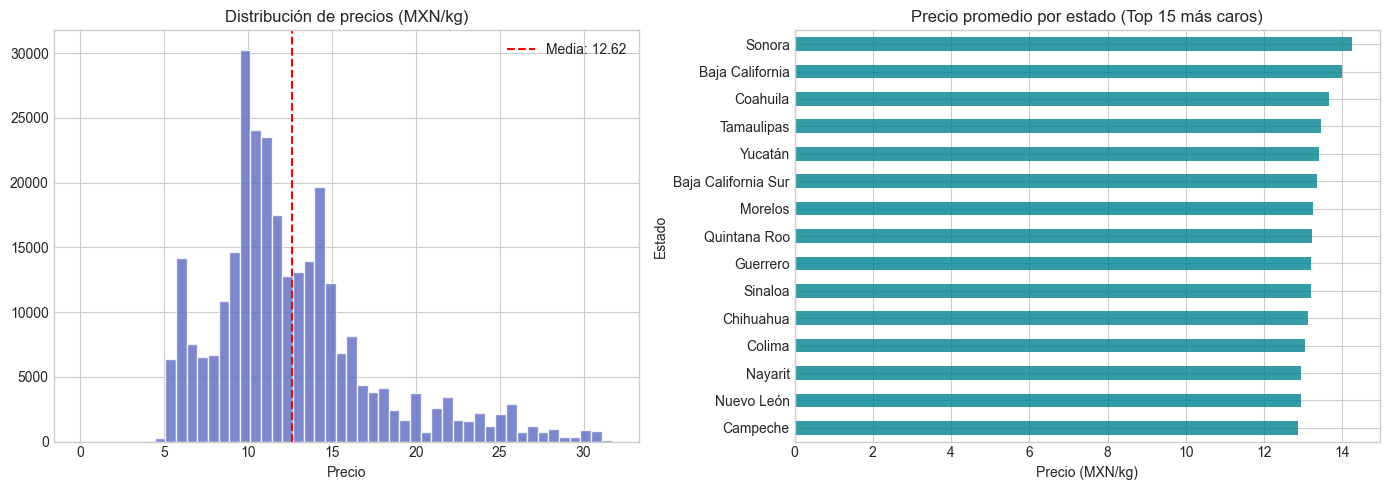

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de precios
axes[0].hist(df_limpio['Precio por kilogramo'], bins=50, color='#5C6BC0', edgecolor='white', alpha=0.8)
axes[0].axvline(df_limpio['Precio por kilogramo'].mean(), color='red', linestyle='--', label=f'Media: {df_limpio["Precio por kilogramo"].mean():.2f}')
axes[0].set_title('Distribución de precios (MXN/kg)')
axes[0].set_xlabel('Precio')
axes[0].legend()

# Precio promedio por estado (top 15)
precio_estado = df_limpio.groupby('Estado')['Precio por kilogramo'].mean().sort_values(ascending=True).tail(15)
precio_estado.plot(kind='barh', ax=axes[1], color='#00838F', alpha=0.8)
axes[1].set_title('Precio promedio por estado (Top 15 más caros)')
axes[1].set_xlabel('Precio (MXN/kg)')
plt.tight_layout()
plt.show()

### 4.5 Precio promedio anual por tipo de tienda

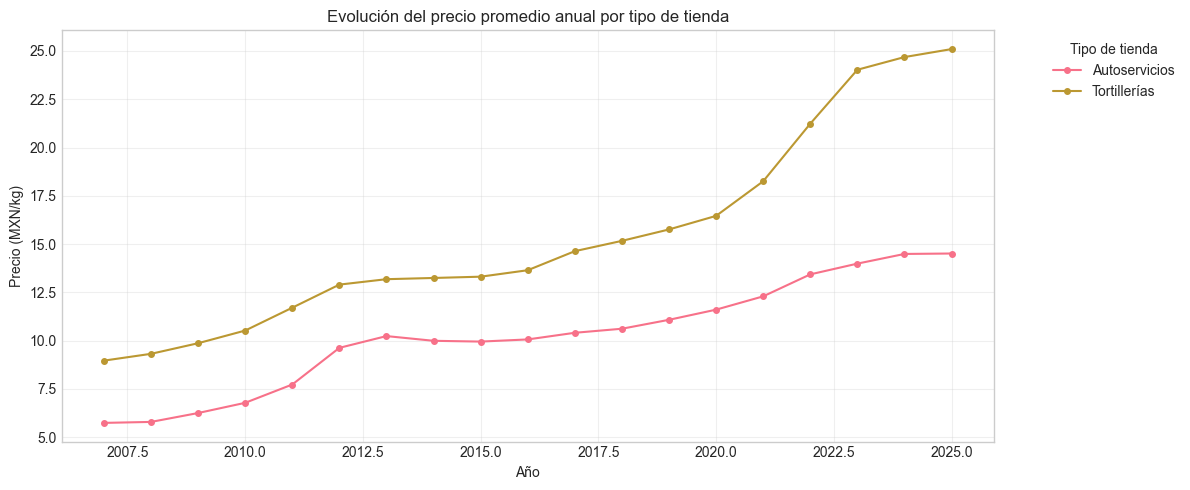

In [43]:
precio_anual_tienda = df_limpio.pivot_table(values='Precio por kilogramo', index='Año', columns='Tipo de tienda', aggfunc='mean')
precio_anual_tienda.plot(figsize=(12, 5), marker='o', markersize=4)
plt.title('Evolución del precio promedio anual por tipo de tienda')
plt.xlabel('Año')
plt.ylabel('Precio (MXN/kg)')
plt.legend(title='Tipo de tienda', bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4.6 Heatmap: Precio promedio por mes y año

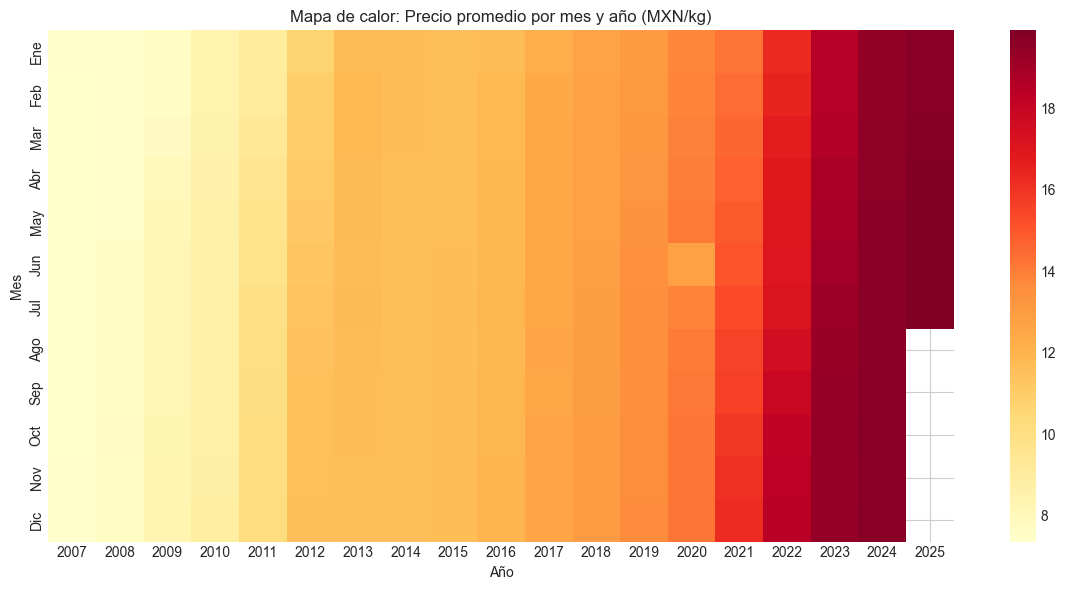

In [44]:
heatmap_data = df_limpio.pivot_table(values='Precio por kilogramo', index='Mes', columns='Año', aggfunc='mean')
meses = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
heatmap_data.index = [meses[int(i)-1] if 1 <= i <= 12 else str(i) for i in heatmap_data.index]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False)
plt.title('Mapa de calor: Precio promedio por mes y año (MXN/kg)')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

---
## 5. Modelos de Machine Learning

### 5.1 Preparación de datos para predicción

Preparamos las variables para predecir el **precio por kilogramo** usando: Estado, Ciudad, Año, Mes, Día y Tipo de tienda.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Crear copia y codificar variables categóricas
df_ml = df_limpio.copy()
le_state = LabelEncoder()
le_city = LabelEncoder()
le_store = LabelEncoder()

df_ml['State_enc'] = le_state.fit_transform(df_ml['Estado'].astype(str))
df_ml['City_enc'] = le_city.fit_transform(df_ml['Ciudad'].astype(str))
df_ml['Store_enc'] = le_store.fit_transform(df_ml['Tipo de tienda'].astype(str))

X = df_ml[['State_enc', 'City_enc', 'Año', 'Mes', 'Día', 'Store_enc']]
y = df_ml['Precio por kilogramo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {len(X_train):,} | Test: {len(X_test):,}")

Train: 235,276 | Test: 58,820


### 5.2 Modelo Random Forest para predicción de precios

In [46]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_test)

print("📊 MÉTRICAS DEL MODELO RANDOM FOREST")
print(f"   R²: {r2_score(y_test, y_pred):.4f}")
print(f"   MAE (Error absoluto medio): {mean_absolute_error(y_test, y_pred):.4f} MXN/kg")
print(f"   RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f} MXN/kg")

📊 MÉTRICAS DEL MODELO RANDOM FOREST
   R²: 0.9984
   MAE (Error absoluto medio): 0.0906 MXN/kg
   RMSE: 0.1977 MXN/kg


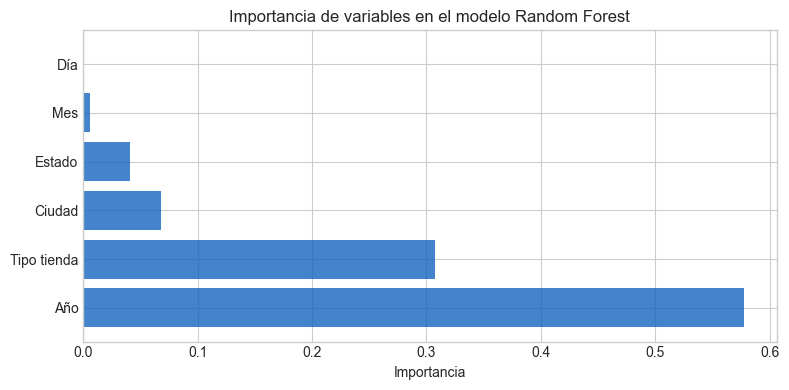

In [47]:
# Importancia de variables
importancias = pd.DataFrame({
    'Variable': ['Estado', 'Ciudad', 'Año', 'Mes', 'Día', 'Tipo tienda'],
    'Importancia': modelo_rf.feature_importances_
}).sort_values('Importancia', ascending=False)

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(importancias['Variable'], importancias['Importancia'], color='#1565C0', alpha=0.8)
ax.set_title('Importancia de variables en el modelo Random Forest')
ax.set_xlabel('Importancia')
plt.tight_layout()
plt.show()

### 5.3 Comparación: Valores reales vs Predichos

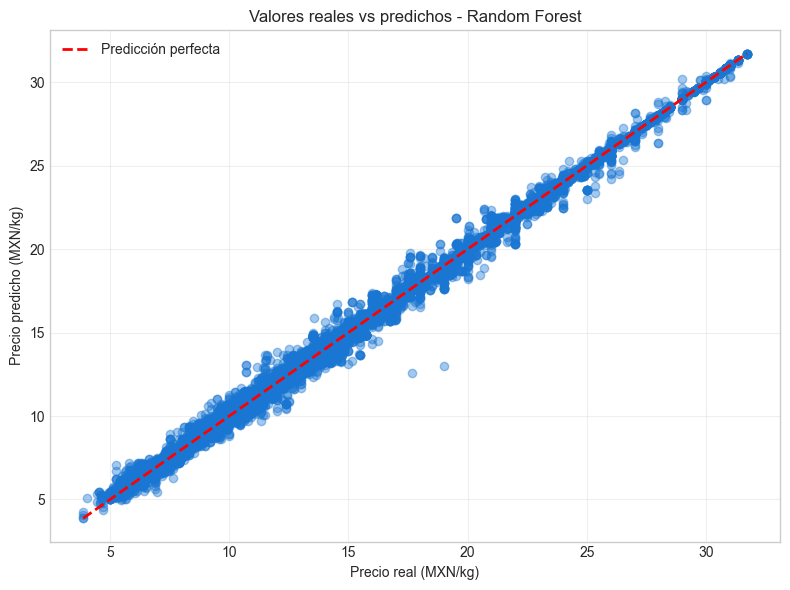

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, y_pred, alpha=0.4, c='#1976D2')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción perfecta')
ax.set_xlabel('Precio real (MXN/kg)')
ax.set_ylabel('Precio predicho (MXN/kg)')
ax.set_title('Valores reales vs predichos - Random Forest')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 5.4 Clustering: Agrupar ciudades por comportamiento de precios

Usamos K-Means para encontrar grupos de ciudades con patrones de precio similares.

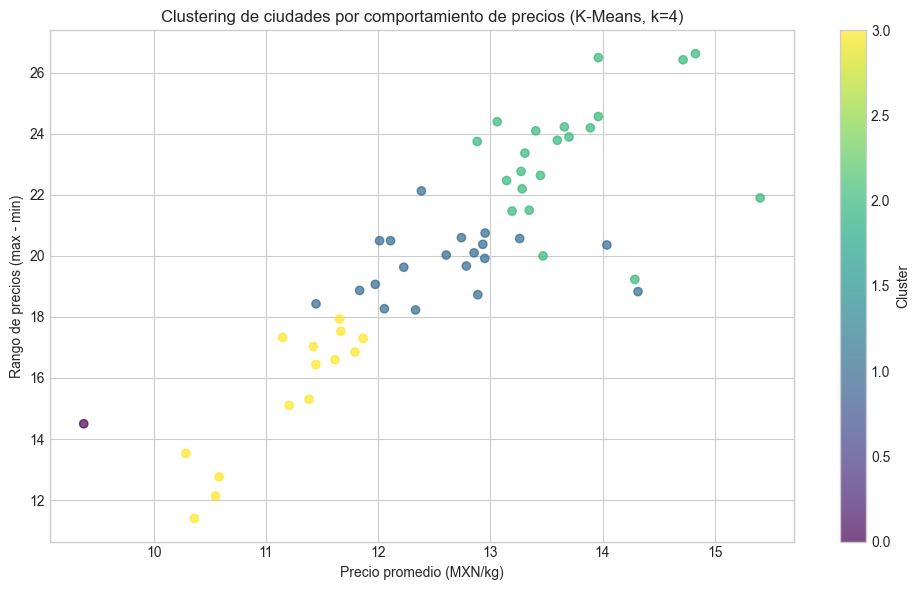

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Agregar por ciudad: precio promedio, desviación estándar, tendencia (precio último año - primer año)
stats_ciudad = df_limpio.groupby('Ciudad')['Precio por kilogramo'].agg(['mean', 'std', 'min', 'max', 'count'])
stats_ciudad = stats_ciudad[stats_ciudad['count'] >= 100].drop(columns='count')
stats_ciudad['rango'] = stats_ciudad['max'] - stats_ciudad['min']
stats_ciudad = stats_ciudad.fillna(0)

scaler = StandardScaler()
X_cluster = scaler.fit_transform(stats_ciudad)
kmeans = KMeans(n_clusters=4, random_state=42)
stats_ciudad['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualizar clusters
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(stats_ciudad['mean'], stats_ciudad['rango'], c=stats_ciudad['Cluster'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Precio promedio (MXN/kg)')
ax.set_ylabel('Rango de precios (max - min)')
ax.set_title('Clustering de ciudades por comportamiento de precios (K-Means, k=4)')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

In [50]:
# Resumen por cluster
print("📋 Características por cluster:")
for c in sorted(stats_ciudad['Cluster'].unique()):
    subset = stats_ciudad[stats_ciudad['Cluster'] == c]
    print(f"\n   Cluster {c}: {len(subset)} ciudades")
    print(f"   - Precio medio: {subset['mean'].mean():.2f} MXN/kg")
    print(f"   - Rango medio: {subset['rango'].mean():.2f}")

📋 Características por cluster:

   Cluster 0: 1 ciudades
   - Precio medio: 9.37 MXN/kg
   - Rango medio: 14.50

   Cluster 1: 20 ciudades
   - Precio medio: 12.63 MXN/kg
   - Rango medio: 19.78

   Cluster 2: 21 ciudades
   - Precio medio: 13.71 MXN/kg
   - Rango medio: 23.34

   Cluster 3: 14 ciudades
   - Precio medio: 11.21 MXN/kg
   - Rango medio: 15.52


---
## 6. Resumen de insights principales

1. **Tendencia temporal:** El precio de la tortilla muestra una tendencia alcista en el periodo 2007-2016.
2. **Variación geográfica:** Existe disparidad de precios entre ciudades y estados; algunas regiones son consistentemente más caras.
3. **Tipo de tienda:** El canal de venta influye en el precio; la diferencia puede ser significativa.
4. **Modelo predictivo:** Random Forest logra predecir precios con buen nivel de precisión usando ubicación, fecha y tipo de tienda.
5. **Clusters:** Las ciudades se agrupan en 4 perfiles según precio promedio y volatilidad.

---
## 7. Análisis de ciencia de datos: Estado de Puebla

En esta sección se realiza un análisis enfocado en el **estado de Puebla**: evolución de precios en el tiempo, comparación entre ciudades del estado, diferencias por tipo de tienda (Tortillerías vs Autoservicios) y estadísticas descriptivas.

In [51]:
# Filtrar datos para el estado de Puebla
df_puebla = df_limpio[df_limpio['Estado'] == 'Puebla'].copy()

print("📌 ESTADO: PUEBLA")
print(f"   Registros: {len(df_puebla):,}")
print(f"   Ciudades: {df_puebla['Ciudad'].nunique()} → {', '.join(sorted(df_puebla['Ciudad'].unique()))}")
print(f"   Periodo: {df_puebla['Año'].min()} - {df_puebla['Año'].max()}")
print(f"\n   Tipos de tienda: {df_puebla['Tipo de tienda'].unique().tolist()}")
print("\n📊 Primeras filas:")
df_puebla.head(10)

📌 ESTADO: PUEBLA
   Registros: 10,436
   Ciudades: 2 → Puebla, ZM Puebla
   Periodo: 2007 - 2025

   Tipos de tienda: ['Tortillerías', 'Autoservicios']

📊 Primeras filas:


,Estado,Ciudad,Año,Mes,Día,Tipo de tienda,Precio por kilogramo,Fecha
30,Puebla,Puebla,2007,1,10,Tortillerías,9.0,2007-01-10
83,Puebla,Puebla,2007,1,12,Tortillerías,9.0,2007-01-12
136,Puebla,Puebla,2007,1,15,Tortillerías,9.0,2007-01-15
189,Puebla,Puebla,2007,1,16,Tortillerías,9.0,2007-01-16
242,Puebla,Puebla,2007,1,17,Tortillerías,9.0,2007-01-17
295,Puebla,Puebla,2007,1,18,Tortillerías,9.0,2007-01-18
348,Puebla,Puebla,2007,1,19,Tortillerías,8.8,2007-01-19
401,Puebla,Puebla,2007,1,20,Tortillerías,8.8,2007-01-20
454,Puebla,Puebla,2007,1,22,Tortillerías,8.8,2007-01-22
507,Puebla,Puebla,2007,1,23,Tortillerías,8.8,2007-01-23


In [60]:
# Estadísticas descriptivas del precio en Puebla
print("📈 ESTADÍSTICAS DESCRIPTIVAS - Puebla (Precio por kilogramo)")
print(df_puebla['Precio por kilogramo'].describe().to_string())
print(f"\n   Comparación con promedio nacional: {df_limpio['Precio por kilogramo'].mean():.2f} MXN/kg")
print(f"   Promedio Puebla: {df_puebla['Precio por kilogramo'].mean():.2f} MXN/kg")
print(f"   Diferencia: {(df_puebla['Precio por kilogramo'].mean() - df_limpio['Precio por kilogramo'].mean()):+.2f} MXN/kg vs nacional")

📈 ESTADÍSTICAS DESCRIPTIVAS - Puebla (Precio por kilogramo)
count    10436.000000
mean        10.475552
std          2.774187
min          5.010000
25%          8.700000
50%          9.970000
75%         11.920000
max         18.000000

   Comparación con promedio nacional: 12.62 MXN/kg
   Promedio Puebla: 10.48 MXN/kg
   Diferencia: -2.14 MXN/kg vs nacional


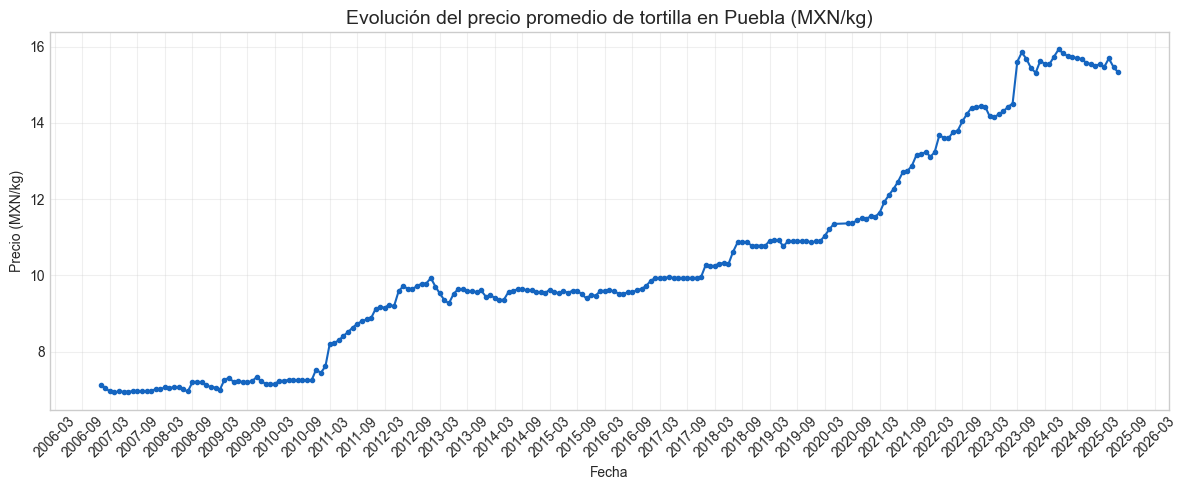

In [61]:
# Evolución del precio promedio en Puebla a lo largo del tiempo
import matplotlib.dates as mdates

precio_puebla_mensual = df_puebla.groupby(['Año', 'Mes'])['Precio por kilogramo'].mean().reset_index()
precio_puebla_mensual['Fecha'] = pd.to_datetime(
    precio_puebla_mensual[['Año', 'Mes']].rename(columns={'Año': 'year', 'Mes': 'month'}).assign(day=1)
)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(precio_puebla_mensual['Fecha'], precio_puebla_mensual['Precio por kilogramo'], color='#1565C0', linewidth=1.5, marker='o', markersize=3)
ax.set_title('Evolución del precio promedio de tortilla en Puebla (MXN/kg)', fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio (MXN/kg)')
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

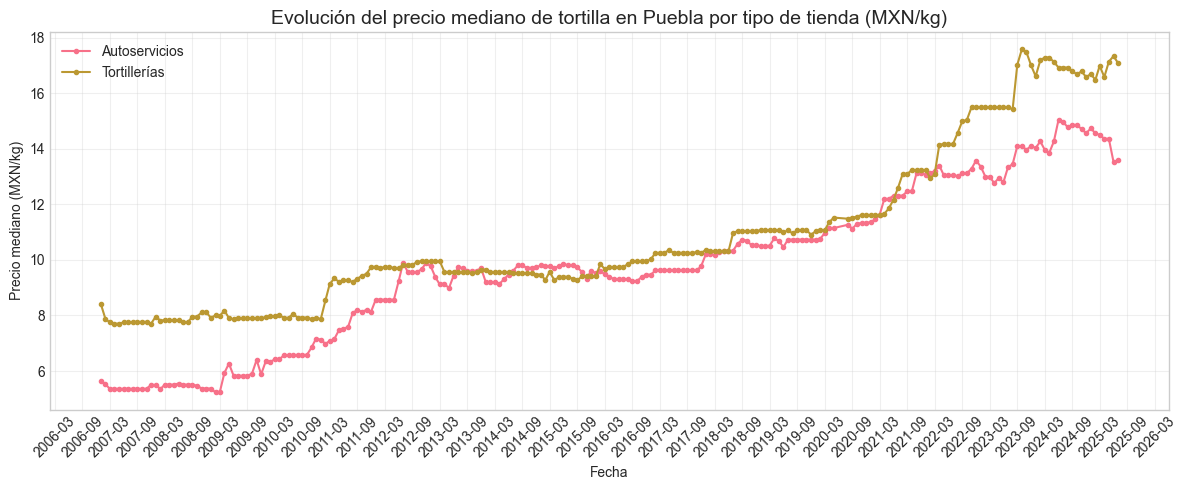

In [58]:
# Evolución del precio mediano (valor típico) por tipo de tienda en Puebla
import matplotlib.dates as mdates

precio_puebla_por_tienda = df_puebla.groupby(['Año', 'Mes', 'Tipo de tienda'])['Precio por kilogramo'].median().reset_index()
precio_puebla_por_tienda['Fecha'] = pd.to_datetime(
    precio_puebla_por_tienda[['Año', 'Mes']].rename(columns={'Año': 'year', 'Mes': 'month'}).assign(day=1)
)

fig, ax = plt.subplots(figsize=(12, 5))
for tipo in precio_puebla_por_tienda['Tipo de tienda'].unique():
    datos = precio_puebla_por_tienda[precio_puebla_por_tienda['Tipo de tienda'] == tipo]
    ax.plot(datos['Fecha'], datos['Precio por kilogramo'], label=tipo, linewidth=1.5, marker='o', markersize=3)
ax.set_title('Evolución del precio mediano de tortilla en Puebla por tipo de tienda (MXN/kg)', fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio mediano (MXN/kg)')
ax.legend()
ax.grid(True, alpha=0.3)
# Formatear eje X: marcas cada 6 meses, etiqueta año-mes legible
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

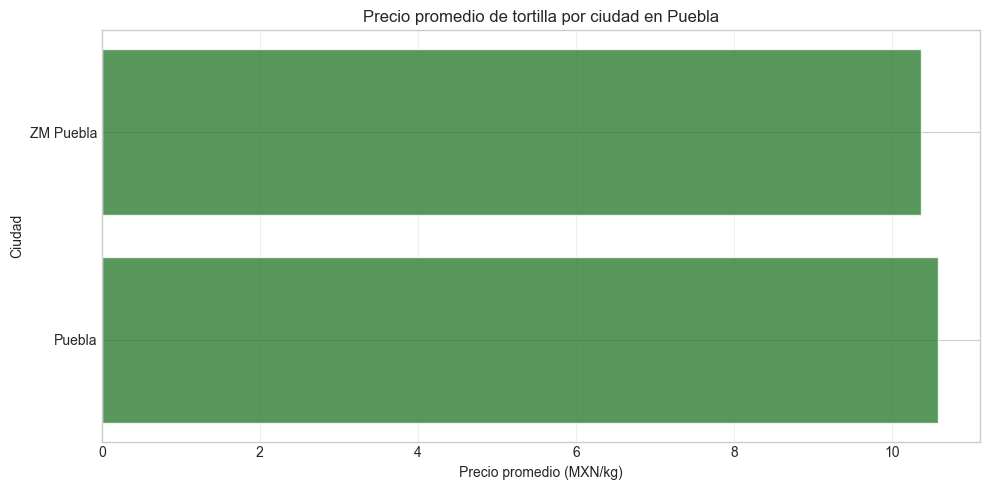

,mean,std,count
Ciudad,,,
Puebla,10.58,2.96,5452
ZM Puebla,10.36,2.55,4984


In [62]:
# Precio promedio por ciudad en Puebla
precio_ciudad_puebla = df_puebla.groupby('Ciudad')['Precio por kilogramo'].agg(['mean', 'std', 'count']).round(2)
precio_ciudad_puebla = precio_ciudad_puebla.sort_values('mean', ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(precio_ciudad_puebla.index, precio_ciudad_puebla['mean'], color='#2E7D32', alpha=0.8, edgecolor='white')
ax.set_xlabel('Precio promedio (MXN/kg)')
ax.set_ylabel('Ciudad')
ax.set_title('Precio promedio de tortilla por ciudad en Puebla')
ax.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
precio_ciudad_puebla

C:\Users\Jaime\AppData\Local\Temp\ipykernel_6936\3210264685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_puebla, x='Tipo de tienda', y='Precio por kilogramo', ax=axes[0], palette='Set2')


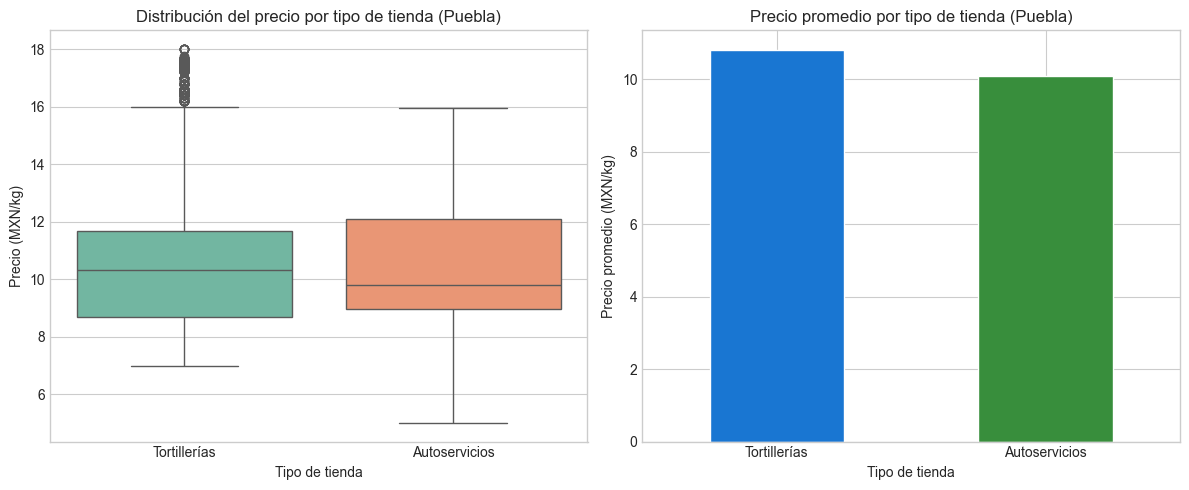

In [63]:
# Precio por tipo de tienda en Puebla
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df_puebla, x='Tipo de tienda', y='Precio por kilogramo', ax=axes[0], palette='Set2')
axes[0].set_title('Distribución del precio por tipo de tienda (Puebla)')
axes[0].set_ylabel('Precio (MXN/kg)')

precio_tienda_puebla = df_puebla.groupby('Tipo de tienda')['Precio por kilogramo'].mean().sort_values(ascending=False)
precio_tienda_puebla.plot(kind='bar', ax=axes[1], color=['#1976D2', '#388E3C'], edgecolor='white')
axes[1].set_title('Precio promedio por tipo de tienda (Puebla)')
axes[1].set_ylabel('Precio promedio (MXN/kg)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

**Insights Puebla:**
- La evolución temporal permite ver si Puebla sigue la tendencia nacional o tiene comportamientos propios.
- Las diferencias entre ciudades del estado reflejan oferta, costos locales y tipo de consumo.
- La comparación Tortillerías vs Autoservicios en Puebla muestra si el canal influye igual que a nivel nacional.

---
## 8. Sistema de predicción de precios

Indica **año** y **mes**; el sistema usa **día = 1** y el modelo Random Forest predice el precio (MXN/kg) para el estado y ciudad indicados, por tipo de tienda. Ajusta las variables en la celda siguiente y ejecuta.

In [68]:
año = 2026
mes = 1
día = 1  


estado = 'Puebla'
ciudad = 'Puebla'

# Predicción para cada tipo de tienda
resultados = []
for tipo_tienda in ['Tortillerías', 'Autoservicios']:
    state_enc = le_state.transform([estado])[0]
    city_enc = le_city.transform([ciudad])[0]
    store_enc = le_store.transform([tipo_tienda])[0]
    X_nuevo = pd.DataFrame([[state_enc, city_enc, año, mes, día, store_enc]],
                           columns=['State_enc', 'City_enc', 'Año', 'Mes', 'Día', 'Store_enc'])
    precio_pred = modelo_rf.predict(X_nuevo)[0]
    resultados.append({'Tipo de tienda': tipo_tienda, 'Precio predicho (MXN/kg)': round(precio_pred, 2)})

print(f"📅 Fecha: {día}/{mes}/{año}  |  📍 {ciudad}, {estado}\n")
print(pd.DataFrame(resultados).to_string(index=False))

📅 Fecha: 1/1/2026  |  📍 Puebla, Puebla

Tipo de tienda  Precio predicho (MXN/kg)
  Tortillerías                     17.37
 Autoservicios                     15.09
